## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## import Dataset

In [3]:
file = pd.read_csv('dataset.csv')
file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning /Preprocessing

In [4]:
# get the info of the data
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# describe the data
file.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
# Drop non-numeric columns for now
numeric_data = file.drop(columns=['track_id', 'artists', 'album_name', 'track_name', ])
# convert track genre from categorical to numerical
numeric_data['track_genre'] = pd.Categorical(numeric_data['track_genre'])
numeric_data['track_genre'] = numeric_data['track_genre'].cat.codes

# Convert bool to int
numeric_data['explicit'] = numeric_data['explicit'].astype(int)

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

## EDA


In [7]:
# # plot the data
# sns.pairplot(scaled_data) # pairplot basically prints all the possile visualizations so thats why we use it

## Clustering

In [8]:
# 1) K Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

# Cluster the tracks based on the features
clustered_data = scaled_data.copy()
clustered_data['cluster'] = kmeans.labels_

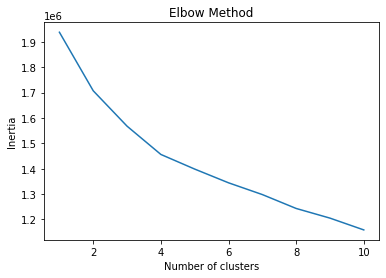

In [9]:
# visualize the clusters using elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Text(0.5, 1.0, 'K Means Clustering')

c:\Users\Ms Links\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


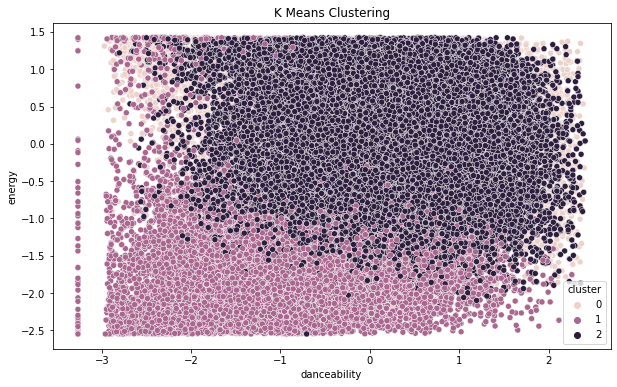

In [13]:
# DBscans
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(numeric_data)
np.unique(dbscan.labels_)
clustered_data['dbscan_cluster'] = dbscan.labels_

# visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_data, x='danceability', y='energy', hue='cluster')
plt.title('K Means Clustering')

### Code Summary
- DBSCAN from the `sklearn.cluster` module is initialized with `eps=0.5` and `min_samples=5`. These parameters define the minimum distance between points to be considered in the same neighborhood (`eps`) and the minimum number of points required to form a dense region (`min_samples`).
- The DBSCAN algorithm is applied to a dataset named `numeric_data`.
- The unique cluster labels identified by DBSCAN are extracted and added to the dataset.
- A scatter plot is created to visualize the clusters. The plot uses `sns.scatterplot` from the Seaborn library and is titled "K Means Clustering", although it's showing the results of DBSCAN clustering.

### Scatter Plot Description
- **Axes**: The scatter plot has 'danceability' on the x-axis and 'energy' on the y-axis.
- **Clusters**: Points are color-coded by their cluster labels identified by DBSCAN, with at least three clusters represented in different colors.
- **Data Distribution**: The plot shows a dense region where many data points are close together, with the density decreasing as 'danceability' increases.

## Profiling

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
data = pd.read_csv("dataset.csv")

# Step 3: Preprocess the data
# Drop non-numeric columns for clustering
numeric_data = data.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

# Convert bool to int
numeric_data['explicit'] = numeric_data['explicit'].astype(int)

# Step 4: Choose and apply a clustering algorithm
# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters as needed
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

# Step 5: Perform profiling on the output clusters
# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Perform profiling
cluster_profiles = data.groupby('cluster').mean()

# Print cluster profiles
print(cluster_profiles)


           Unnamed: 0  popularity    duration_ms  explicit  danceability  \
cluster                                                                    
0        64161.172257   34.329370  214296.869602  0.000643      0.538378   
1        60507.777794   32.426106  211426.647316  0.000000      0.672083   
2        49197.385732   33.993378  270516.790514  0.000196      0.487526   
3        50212.527123   36.044491  204260.652035  0.966856      0.634650   
4        55540.730422   27.649183  221400.609539  0.001342      0.350045   

           energy       key   loudness      mode  speechiness  acousticness  \
cluster                                                                       
0        0.391126  5.001527 -10.468296  0.758687     0.054425      0.667829   
1        0.748006  5.530816  -6.264506  0.614709     0.083281      0.196920   
2        0.798771  5.371673  -6.300044  0.586900     0.077051      0.072002   
3        0.720926  5.351946  -6.626855  0.581965     0.214677      0.228